In [1]:
import pandas as pd
import numpy as np


In [2]:
df_data = pd.read_csv("C:/Users/HP/Downloads/IFT2.csv")
print(df_data.head())

   Water  Acidity   BDV     DF  Colour  IFT Label
0     13    0.005  48.0  0.038     2.0   24  good
1     22    0.096  68.0  0.021     3.0   17   bad
2      8    0.030  70.0  0.013     1.0   26  good
3     12    0.032  57.0  0.010     1.0   26  good
4      6    0.036  77.0  0.034     2.0   24  good


# Pre-processing Data

In [3]:
def generate_labels(label):
    if(label =="excellent"):
        return 0
    elif(label =="good"):
        return 1
    elif(label =="bad"):
        return 2

df_data['labels'] = df_data.apply(lambda x : generate_labels(x['Label']),axis=1)
df_data.drop(columns=['Label','IFT'],inplace=True,axis=1)
print(df_data.head())

   Water  Acidity   BDV     DF  Colour  labels
0     13    0.005  48.0  0.038     2.0       1
1     22    0.096  68.0  0.021     3.0       2
2      8    0.030  70.0  0.013     1.0       1
3     12    0.032  57.0  0.010     1.0       1
4      6    0.036  77.0  0.034     2.0       1


,Labels,Count
labels,,
0,excellent,507
1,good,78
2,bad,145


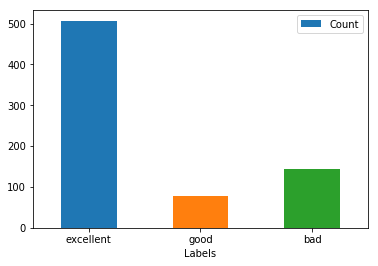

In [237]:
# Count of each class and its pictorial view
df_visual= pd.DataFrame(df_data.groupby('labels').size())
df_visual['Labels'] = ['excellent','good','bad']
df_visual['Count']= df_visual.iloc[:,0]

df_visual = df_visual.iloc[:,1:3]
df_visual.plot.bar(x='Labels', y='Count', rot=0)
df_visual



In [5]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data = df_data['labels'].values
X_data = df_data.iloc[:,0:5].values
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)



In [6]:
# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.10, random_state=42)
    

# Classification Metrics

In [78]:
# Confusion matrix plotting
import seaborn as sns
import matplotlib.pyplot as plt 

def confusion_matrix_plot(cm):    

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['excellent', 'good','bad']); ax.yaxis.set_ticklabels(['excellent', 'good','bad']);
    

In [79]:
# Generate Classification Report
from __future__ import division
from sklearn.metrics import classification_report
def generate_report(y_test,y_pred):
    target_names = ['excellent', 'good', 'bad']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
# Generate individual accuracies
def individual_accuracies(conf_matrix):
    print("Accuracy of Excellent : ", (conf_matrix[0,0]/np.sum(conf_matrix[0,:])*100))
    print("Accuracy of Good : ", (conf_matrix[1,1]/np.sum(conf_matrix[1,:])*100))
    print("Accuracy of Bad : ", (conf_matrix[2,2]/np.sum(conf_matrix[2,:])*100))
    

# Miss-classification of bad Transformers
def miss_bad(conf_matrix):
    print conf_matrix[2,2],"/", np.sum(conf_matrix[2,:]), " transformers correctly classified as bad and ",np.sum(conf_matrix[2,0:2]),"/", np.sum(conf_matrix[2,:]),"bad transformers classified having no problem"
    print("Miss-classification of Bad Transformers : ", (np.sum(conf_matrix[2,0:2])/np.sum(conf_matrix[2,:])*100))
    
    
    

# Naive Bayes

('accuracy =', 82.1917808219178)
             precision    recall  f1-score   support

  excellent       0.79      1.00      0.88        44
       good       0.00      0.00      0.00         9
        bad       0.94      0.80      0.86        20

avg / total       0.73      0.82      0.77        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 0.0)
('Accuracy of Bad : ', 80.0)
16 / 20  transformers correctly classified as bad and  4 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 20.0)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


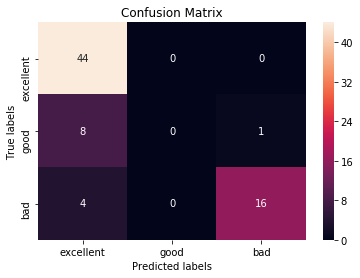

In [146]:
# Naive Bayes Algorithm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)
y_pred = naive_bayes.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# Support Vector Machine

('accuracy =', 86.3013698630137)
             precision    recall  f1-score   support

  excellent       0.90      1.00      0.95        44
       good       0.00      0.00      0.00         9
        bad       0.79      0.95      0.86        20

avg / total       0.76      0.86      0.81        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 0.0)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


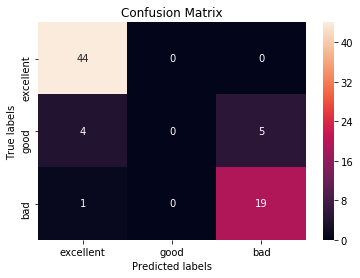

In [147]:
#Support Vector Machine
from sklearn import svm
support_vector = svm.SVC(gamma='auto',kernel='rbf')
support_vector.fit(X_train,y_train)
y_pred = support_vector.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)



In [125]:
# Grid Search CV for SVM
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1,2,5,8,10]}
support_vector = svm.SVC(gamma='auto')
grid_search_svm = GridSearchCV(support_vector, parameters, cv=5)
grid_search_svm.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 2, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
# Best parameters
grid_search_svm.best_params_

{'C': 10, 'kernel': 'linear'}

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


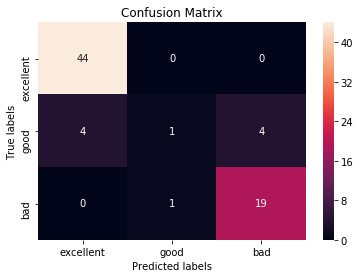

In [148]:
# Support Vector Machine with best parameter set
from sklearn import svm
support_vector = svm.SVC(gamma='auto',kernel='linear',C=10)
support_vector.fit(X_train,y_train)
y_pred = support_vector.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)

# Logistic Regression

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.90      1.00      0.95        44
       good       1.00      0.11      0.20         9
        bad       0.83      0.95      0.88        20

avg / total       0.89      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


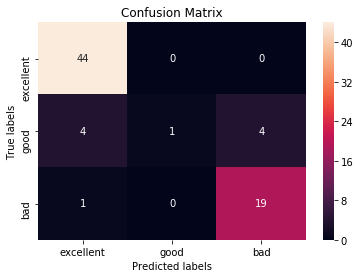

In [150]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


In [167]:
# Grid Search CV for Logistic Regression
from sklearn.model_selection import GridSearchCV
parameters = { 'C':(list(np.logspace(0, 4, 10))), 'solver' :('lbfgs','newton-cg','sag')}
logistic = LogisticRegression(random_state=0,multi_class='multinomial')
grid_search_logistic = GridSearchCV(logistic, parameters, cv=5)
grid_search_logistic.fit(X_train,y_train)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 2.7825594022071245, 7.742636826811269, 21.544346900318832, 59.94842503189409, 166.81005372000593, 464.15888336127773, 1291.5496650148827, 3593.813663804626, 10000.0], 'solver': ('lbfgs', 'newton-cg', 'sag')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
# Best parameters
grid_search_logistic.best_params_

{'C': 464.15888336127773, 'solver': 'lbfgs'}

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


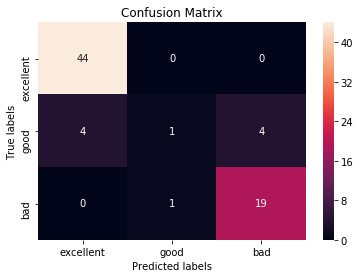

In [169]:
# Logistic Regression with best parameter set

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs',multi_class='multinomial',C=464.15888336127773)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# Random Forest

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


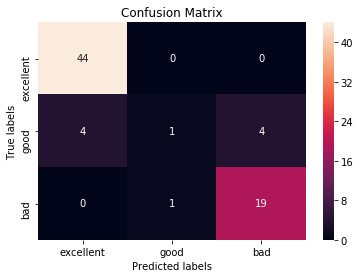

In [176]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# Feature Selection
## 1.Univariate Selection

,Score
Feature,
Water,10.876739
Acidity,106.994034
BDV,0.693949
DF,54.147471
Color,228.579744


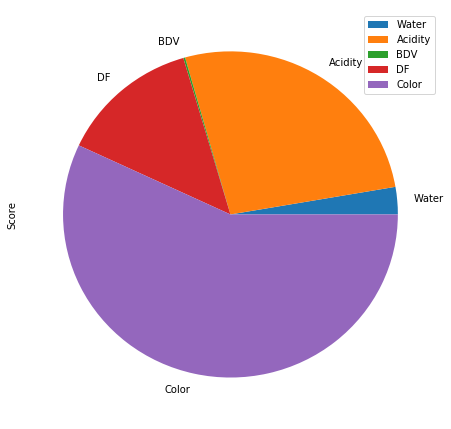

In [201]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_features = pd.DataFrame(["Water","Acidity","BDV","DF","Color"])
features_score = pd.concat([df_features,df_scores,],axis=1)
features_score.columns=['Feature','Score']
features_score = features_score.set_index('Feature')
features_score.plot.pie(y='Score', figsize=(7.5, 7.5))
features_score

## 2. Feature Importance

,Features,Importance
0,Water,0.086261
1,Acidity,0.210766
2,BDV,0.113150
3,DF,0.245279
4,Color,0.344544


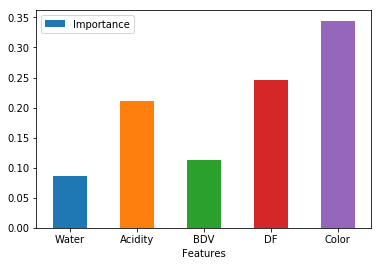

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

feature_imp = ExtraTreesClassifier()
feature_imp.fit(X_train,y_train)
features_df = pd.DataFrame({'Features': ["Water","Acidity","BDV","DF","Color"], 'Importance': feature_imp.feature_importances_})
features_df.plot.bar(x='Features', y='Importance', rot=0)
features_df

## 3. Correlation Matrix

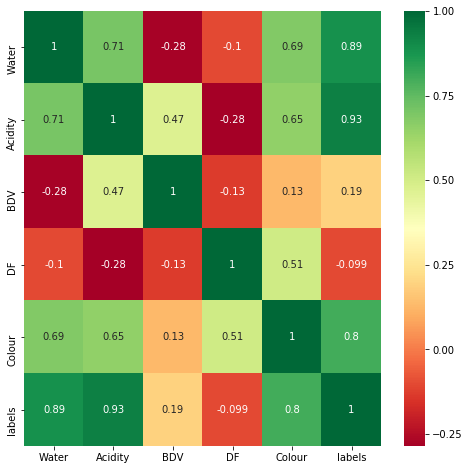

In [218]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_data.iloc[0:5].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_data.iloc[0:5][top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Result:** In accordance to all the feature selection techniques the most important features are **1.** *Color* **2.** *Acidity* **3.** *Dissipation Factor*

# T-SNE Visualization

In [8]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3)
X_tsne = X_embedded.fit_transform(X_data)

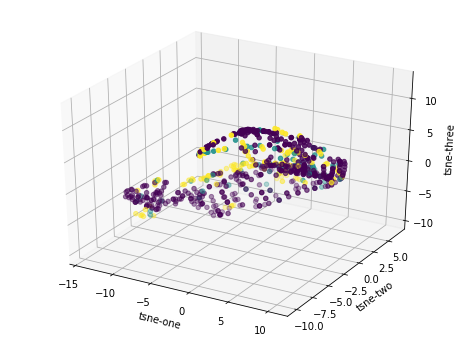

In [187]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(8,6)).gca(projection='3d')
ax.scatter(
    xs=X_tsne[:,0], 
    ys=X_tsne[:,1], 
    zs=X_tsne[:,2], 
    c=y_data

)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()


## N- Fold Cross Validation


### 1. Visualization

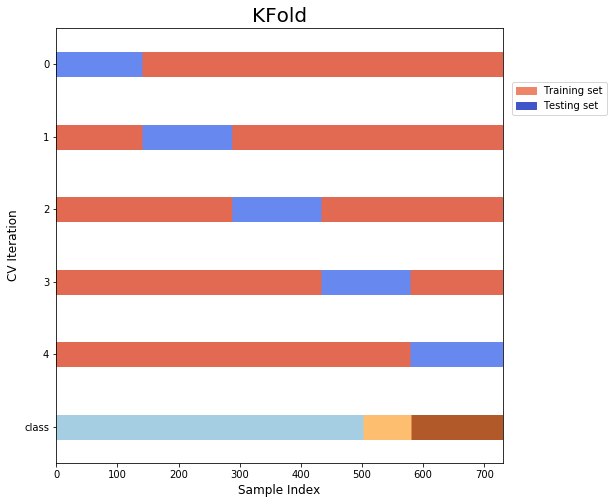

In [131]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
n_splits = 5
cv = KFold(n_splits)

def cross_valid_visual(cv,X_data_scaled,y_data):
        from matplotlib.patches import Patch
        np.random.seed(1338)
        cmap_data = plt.cm.Paired
        cmap_cv = plt.cm.coolwarm
        fig, ax = plt.subplots(figsize=(8, 8))
        for location, (train, test) in enumerate(cv.split(X=X_data_scaled, y=y_data)):
            array_cv = np.array([-5]*len(X_data_scaled))
            array_cv[train] = 1
            array_cv[test] = 0

            ax.scatter(range(len(array_cv)), [location + 0.5] * len(array_cv),
                           c=array_cv, marker='_', lw=25, cmap=cmap_cv,
                           vmin=-.2, vmax=1.2)
            ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
                      ['Training set', 'Testing set'], loc=(1.02, .8))

        ax.scatter(range(len(y_data)), [location + 1.5] * len(y_data),
                       c=np.sort(y_data), marker='_', lw=25, cmap=cmap_data)

        yticklabels = list(range(n_splits)) + ['class']
        ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
                   ylim=[n_splits+1, 0], xlim=[0, len(X_data_scaled)])
        ax.set_ylabel('CV Iteration', fontsize=12)
        ax.set_xlabel('Sample Index', fontsize=12)
        
        ax.set_title('{}'.format(type(cv).__name__), fontsize=20)

cross_valid_visual(cv,X_data_scaled,y_data)

### 2. Model Evaluation with Cross Validation

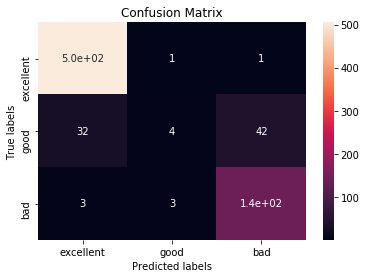

In [82]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
y_pred = cross_val_predict(random_forest, X_data_scaled, y_data, cv=5)
conf_matrix = confusion_matrix(y_data, y_pred)
confusion_matrix_plot(conf_matrix)


**Result :** Classification of Good class is again not accurate therefore shifting to make the classification of good better

## One vs All Classifier Approach 

In [91]:
# Changing the input data
df_data_one_all = pd.read_csv("C:/Users/HP/Downloads/IFT2.csv")

def generate_labels_one_all(label):
    if(label =="excellent"):
        return 0
    elif(label =="good"):
        return 1
    elif(label =="bad"):
        return 0

df_data_one_all['labels'] = df_data_one_all.apply(lambda x : generate_labels_one_all(x['Label']),axis=1)
df_data_one_all.drop(columns=['Label','IFT'],inplace=True,axis=1)
print(df_data_one_all.head())

   Water  Acidity   BDV     DF  Colour  labels
0     13    0.005  48.0  0.038     2.0       1
1     22    0.096  68.0  0.021     3.0       0
2      8    0.030  70.0  0.013     1.0       1
3     12    0.032  57.0  0.010     1.0       1
4      6    0.036  77.0  0.034     2.0       1


          Labels  Count
labels                 
0       Not Good    652
1           Good     78


,Labels,Count
labels,,
0,Not Good,652
1,Good,78


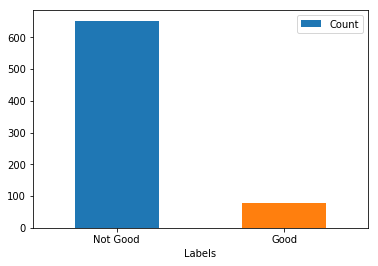

In [93]:
# Count of each class and its pictorial view
df_visual_one_all= pd.DataFrame(df_data_one_all.groupby('labels').size())


df_visual_one_all['Labels'] = ['Not Good','Good']
df_visual_one_all['Count']= df_visual_one_all.iloc[:,0]

df_visual_one_all = df_visual_one_all.iloc[:,1:3]
print(df_visual_one_all)
df_visual_one_all.plot.bar(x='Labels', y='Count', rot=0)
df_visual_one_all


In [144]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data_one_all = df_data_one_all['labels'].values
X_data_one_all = df_data_one_all.iloc[:,0:5].values
scaler_one_all = MinMaxScaler()
X_data_scaled_one_all = scaler_one_all.fit_transform(X_data_one_all)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_one_all, X_test_one_all, y_train_one_all, y_test_one_all = train_test_split(X_data_scaled_one_all, y_data_one_all, test_size=0.10, random_state=42)
    


In [102]:
# Confusion matrix plotting
import seaborn as sns
import matplotlib.pyplot as plt 

def confusion_matrix_plot_one_all(cm):    

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Good', 'Good']); ax.yaxis.set_ticklabels(['Not Good', 'Good']);


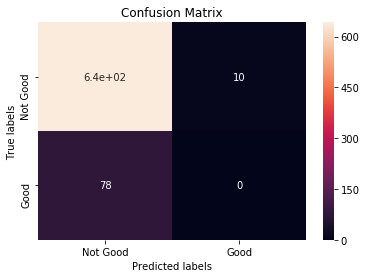

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_one_all = cross_val_predict(logistic, X_data_scaled_one_all, y_data_one_all, cv=5)
conf_matrix = confusion_matrix(y_data_one_all, y_pred_one_all)
confusion_matrix_plot_one_all(conf_matrix)

**Result:** Even the *one vs all* technique doesnot work with random forest which are known to work well for imbalanced data sets. Now we need to deal with the class imbalance problem by : (a) Upsampling the minority class (b) Downsampling class (c) Generating synthetic data

## Data Tweaking 

### 1.Oversampling Minority Class 

In [138]:
from sklearn.utils import resample
import pandas as pd

df_good = df_data_one_all[df_data_one_all['labels']==1]
df_not_good = df_data_one_all[df_data_one_all['labels']==0]

df_good.drop(columns=['labels'],inplace=True,axis=1)
df_not_good.drop(columns=['labels'],inplace=True,axis=1)

good_upsample = resample(df_good.values,
                          replace=True, # sample with replacement
                          n_samples=len(df_not_good.values), # match number in majority class
                          random_state=27) # reproducible results

not_good_upsample = df_not_good.values

df_good_upsample = pd.DataFrame(list(good_upsample))
df_good_upsample['labels'] = [1]*len(good_upsample)

df_not_good_upsample = pd.DataFrame(list(not_good_upsample))
df_not_good_upsample['labels'] = [0]*len(not_good_upsample)


upsampled_df = pd.concat([df_good_upsample, df_not_good_upsample])

upsampled_df.head()




,0,1,2,3,4,labels
0,3.0,0.026,84.0,0.025,2.0,1
1,3.0,0.005,66.0,0.001,0.0,1
2,4.0,0.005,84.0,0.007,0.0,1
3,12.0,0.048,90.2,0.024,2.0,1
4,3.0,0.005,66.0,0.001,0.0,1


,Labels,Count
labels,,
0,Not Good,652
1,Good,652


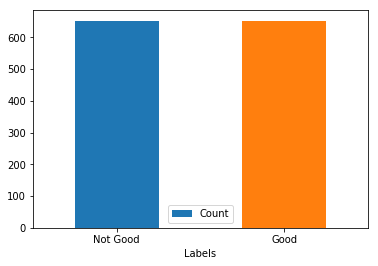

In [143]:
# Count of each class and its pictorial view
df_visual_up= pd.DataFrame(upsampled_df.groupby('labels').size())


df_visual_up['Labels'] = ['Not Good','Good']
df_visual_up['Count']= df_visual_up.iloc[:,0]

df_visual_up = df_visual_up.iloc[:,1:3]
df_visual_up.plot.bar(x='Labels', y='Count', rot=0)
df_visual_up

In [147]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data_up = upsampled_df['labels'].values
X_data_up = upsampled_df.iloc[:,0:5].values
scaler_up = MinMaxScaler()
X_data_up = scaler_up.fit_transform(X_data_up)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_data_up, y_data_up, test_size=0.10, random_state=42)
    


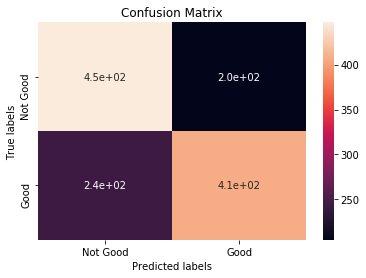

In [149]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_up = cross_val_predict(logistic, X_data_up, y_data_up, cv=5)
conf_matrix = confusion_matrix(y_data_up, y_pred_up)
confusion_matrix_plot_one_all(conf_matrix)

### 2. Downsampling Majority Class

In [151]:
from sklearn.utils import resample
import pandas as pd

not_good_down = resample(df_not_good.values,
                          replace=True, # sample with replacement
                          n_samples=len(df_good.values), # match number in majority class
                          random_state=27) # reproducible results

good_down = df_good.values

df_not_good_down = pd.DataFrame(list(not_good_down))
df_not_good_down['labels'] = [0]*len(not_good_down)

df_good_down = pd.DataFrame(list(good_down))
df_good_down['labels'] = [1]*len(good_down)


downsampled_df = pd.concat([df_good_down, df_not_good_down])

downsampled_df.head()



,0,1,2,3,4,labels
0,13.0,0.005,48.0,0.038,2.0,1
1,8.0,0.030,70.0,0.013,1.0,1
2,12.0,0.032,57.0,0.010,1.0,1
3,6.0,0.036,77.0,0.034,2.0,1
4,5.0,0.076,75.0,0.032,1.0,1


,Labels,Count
labels,,
0,Not Good,78
1,Good,78


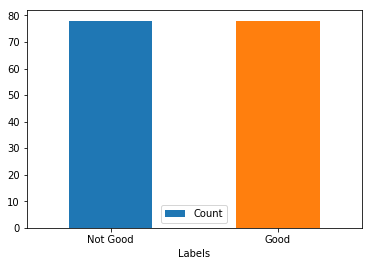

In [152]:
# Count of each class and its pictorial view
df_visual_down= pd.DataFrame(downsampled_df.groupby('labels').size())


df_visual_down['Labels'] = ['Not Good','Good']
df_visual_down['Count']= df_visual_down.iloc[:,0]

df_visual_down = df_visual_down.iloc[:,1:3]
df_visual_down.plot.bar(x='Labels', y='Count', rot=0)
df_visual_down

In [154]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data_down = downsampled_df['labels'].values
X_data_down = downsampled_df.iloc[:,0:5].values
scaler_down = MinMaxScaler()
X_data_down = scaler_down.fit_transform(X_data_down)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_data_down, y_data_down, test_size=0.10, random_state=42)
    

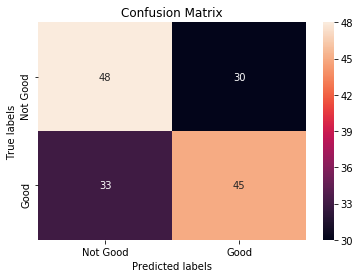

In [162]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_down = cross_val_predict(logistic, X_data_down, y_data_down, cv=5)
conf_matrix = confusion_matrix(y_data_down, y_pred_down)
confusion_matrix_plot_one_all(conf_matrix)

### 3. Synthetic Augmentation

In [179]:


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

sm = SMOTE(random_state=27, ratio=1.0)
X_sm, y_sm = sm.fit_sample(X_data_scaled_one_all, y_data_one_all)

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_sm = cross_val_predict(logistic, X_sm, y_sm, cv=5)
conf_matrix = confusion_matrix(y_sm, y_pred_sm)
confusion_matrix_plot_one_all(conf_matrix)


"\n#from imblearn.over_sampling import SMOTE\nfrom sklearn.model_selection import cross_val_predict\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\n\nsm = SMOTE(random_state=27, ratio=1.0)\nX_sm, y_sm = sm.fit_sample(X_data_scaled_one_all, y_data_one_all)\n\nlogistic = LogisticRegression(random_state=0, solver='lbfgs')\ny_pred_sm = cross_val_predict(logistic, X_sm, y_sm, cv=5)\nconf_matrix = confusion_matrix(y_sm, y_pred_sm)\nconfusion_matrix_plot_one_all(conf_matrix)\n"

## Feature Extraction

### 1. Principal Component Analysis(PCA)

,Components,Variance
0,comp1,0.607403
1,comp2,0.210148
2,comp3,0.108994
3,comp4,0.050163
4,comp5,0.023292


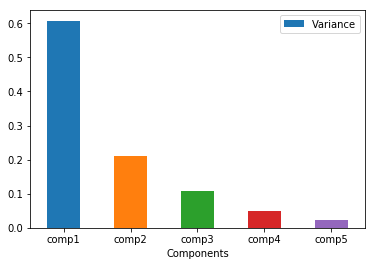

In [175]:
from sklearn.decomposition import PCA
num_features = 5
pca_one_all = PCA(n_components = num_features)
pca_one_all.fit(X_data_scaled_one_all)
variance_ratio = pca_one_all.explained_variance_ratio_

components_df = pd.DataFrame({'Components': ["comp1","comp2","comp3","comp4","comp5"], 'Variance': variance_ratio})
components_df.plot.bar(x='Components', y='Variance', rot=0)
components_df


**Result:** The first three components are responsible for most of the variance of data *(93%)* therefore we would continue our analysis using only the first three components

### Visualization of PCA 

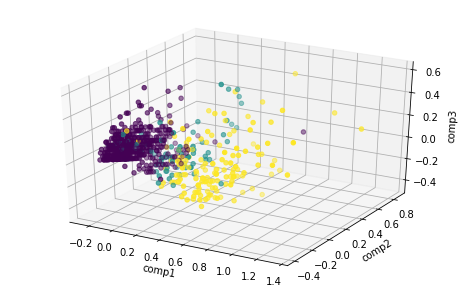

In [193]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


num_features = 3
pca = PCA(n_components = num_features)
X_pca = pca.fit_transform(X_data_scaled_one_all)
ax = plt.figure(figsize=(8,5)).gca(projection='3d')
ax.scatter(
    xs=X_pca[:,0], 
    ys=X_pca[:,1], 
    zs=X_pca[:,2], 
    c=y_data

)
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()


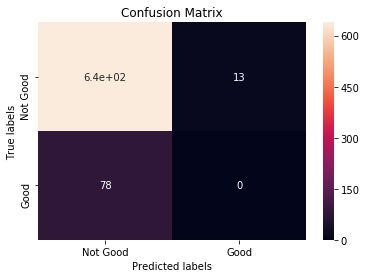

In [186]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

num_features = 3



pca = PCA(n_components = num_features)
X_pca = pca.fit_transform(X_data_scaled_one_all)

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_pca = cross_val_predict(logistic, X_pca, y_data_one_all, cv=5)
conf_matrix_pca = confusion_matrix(y_data_one_all, y_pred_pca)
confusion_matrix_plot_one_all(conf_matrix_pca)

### 2. Linear Discriminant Analysis(LDA)

In [202]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_features = 2
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X_data_scaled_one_all,y_data_one_all).transform(X_data_scaled_one_all)


print(lda.explained_variance_ratio_)

[1.]


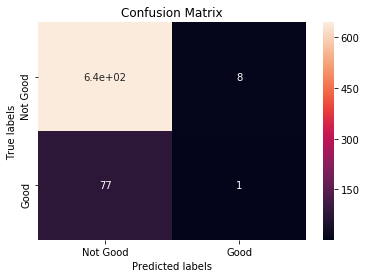

In [203]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_lda = cross_val_predict(logistic, X_lda, y_data_one_all, cv=5)
conf_matrix_lda = confusion_matrix(y_data_one_all, y_pred_lda)
confusion_matrix_plot_one_all(conf_matrix_lda)

## Feature Subsets

### 1. Subset of top three features 

The top three features based on feature importance are ***Colour***, ***Acidity*** and Dissipation Factor(***DF***)

In [218]:
df_subset = df_data_one_all[['Acidity','DF','Colour','labels']]
df_subset.head()

,Acidity,DF,Colour,labels
0,0.005,0.038,2.0,1
1,0.096,0.021,3.0,0
2,0.030,0.013,1.0,1
3,0.032,0.010,1.0,1
4,0.036,0.034,2.0,1


In [219]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_sub = df_subset['labels'].values
X_sub = df_subset.iloc[:,0:3].values
scaler_sub = MinMaxScaler()
X_scaled_sub = scaler_sub.fit_transform(X_sub)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_scaled_sub, y_sub, test_size=0.10, random_state=42)

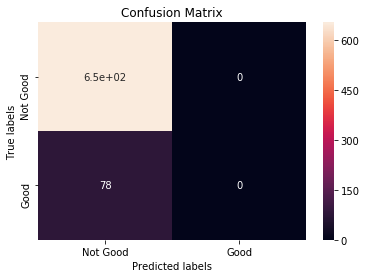

In [220]:
#Five Fold Cross Validation

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_sub = cross_val_predict(logistic, X_scaled_sub, y_sub, cv=5)
conf_matrix_sub = confusion_matrix(y_sub, y_pred_sub)
confusion_matrix_plot_one_all(conf_matrix_sub)

('accuracy =', 87.67123287671232)


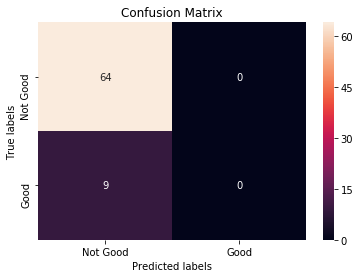

In [221]:
# No cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logistic.fit(X_train_sub,y_train_sub)
y_pred_sub = logistic.predict(X_test_sub)
score = accuracy_score(y_test_sub, y_pred_sub, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix_sub = confusion_matrix(y_test_sub, y_pred_sub)
confusion_matrix_plot_one_all(conf_matrix_sub)


### 2. Subset with top two features 

In [251]:
df_subset_two = df_data_one_all[['Acidity','Colour','labels']]
df_subset_two.head()


,Acidity,Colour,labels
0,0.005,2.0,1
1,0.096,3.0,0
2,0.030,1.0,1
3,0.032,1.0,1
4,0.036,2.0,1


In [257]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_sub_two = df_subset_two['labels'].values
X_sub_two = df_subset_two.iloc[:,0:2].values
scaler_sub_two = MinMaxScaler()
X_scaled_sub_two = scaler_sub_two.fit_transform(X_sub_two)

# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train_sub_two, X_test_sub_two, y_train_sub_two, y_test_sub_two = train_test_split(X_scaled_sub_two, y_sub_two, test_size=0.10, random_state=42)

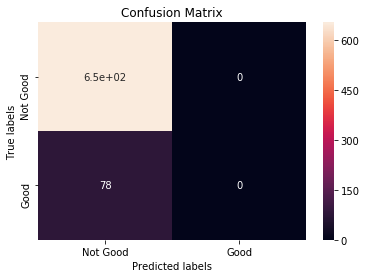

In [258]:
#Five Fold Cross Validation

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0, solver='lbfgs')
y_pred_sub_two = cross_val_predict(logistic, X_scaled_sub_two, y_sub_two, cv=5)
conf_matrix_sub_two = confusion_matrix(y_sub_two, y_pred_sub_two)
confusion_matrix_plot_one_all(conf_matrix_sub_two)

## Prototypical Approach(Clustering)

In [250]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

num_features = 2
pca_one_all = PCA(n_components = num_features)
X_cluster = pca_one_all.fit_transform(X_data_scaled_one_all)


kmeans = KMeans(n_clusters=2)
kmeans.fit(df_data_one_all.iloc[:,0:5])
cluster_labels = kmeans.predict(df_data_one_all.iloc[:,0:5])
cluster_centroids = kmeans.cluster_centers_

df_cluster = pd.DataFrame(X_cluster)
df_cluster.columns= ['dim1','dim2']



<Figure size 360x360 with 0 Axes>

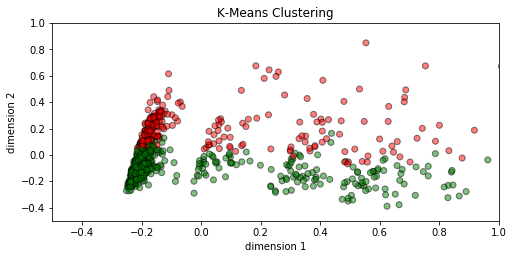

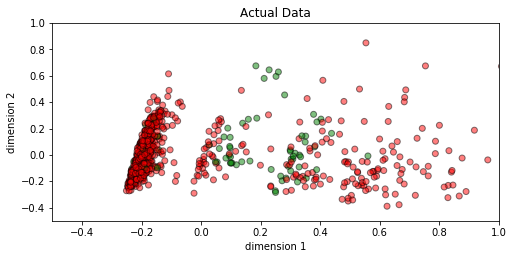

In [249]:
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g'}

colors1 = map(lambda x: colmap[x+1], cluster_labels)
colors2 = map(lambda x: colmap[x+1], df_data_one_all['labels'].values)

plt.subplots(figsize=(8, 8))

plt.subplot(211)
plt.scatter(df_cluster['dim1'], df_cluster['dim2'], color=colors1, alpha=0.5, edgecolor='k')
plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("K-Means Clustering")
plt.show()

plt.subplots(figsize=(8, 8))

plt.subplot(212)
plt.scatter(df_cluster['dim1'], df_cluster['dim2'], color=colors2, alpha=0.5, edgecolor='k')
plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("Actual Data")
plt.show()


